<a href="https://colab.research.google.com/github/Tommy3072/MineriaDeDatos/blob/main/Taller10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reporte de evaluación:
               precision    recall  f1-score   support

           1       0.77      0.90      0.83       141
           2       0.59      0.34      0.43        59

    accuracy                           0.73       200
   macro avg       0.68      0.62      0.63       200
weighted avg       0.71      0.73      0.71       200

Reporte de prueba:
               precision    recall  f1-score   support

           1       0.68      0.83      0.75       136
           2       0.32      0.17      0.22        64

    accuracy                           0.62       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.57      0.62      0.58       200



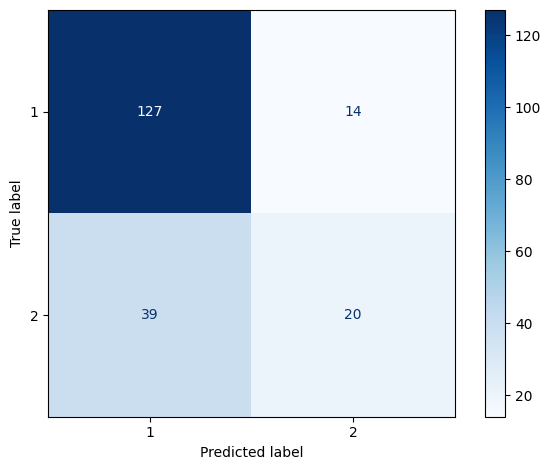

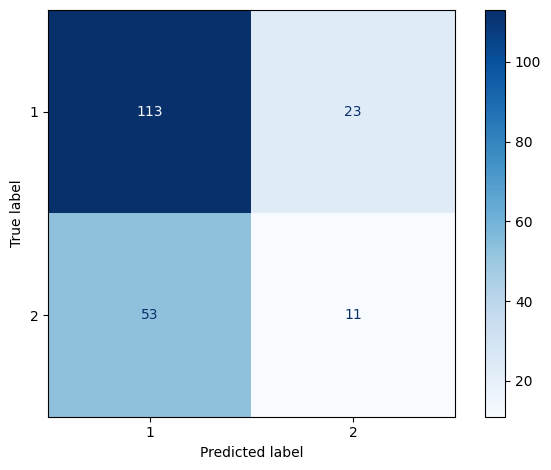

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Cargar el archivo CSV con el delimitador adecuado
df = pd.read_csv("credito.csv", delimiter=";")

# Ahora podemos definir las características y la variable objetivo
X = df[["edad", "alojamiento", "monto", "duracion_prestamo", "proposito", "trabajador_extranjero"]]
y = df["incumplimiento"]


# Dividir el dataset en 60% entrenamiento y 40% temporal
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, train_size=0.6)

# Dividir el temporal en 20% evaluación y 20% prueba
x_test, x_eval, y_test, y_eval = train_test_split(x_temp, y_temp, test_size=0.5, train_size=0.5)

# Escalamiento de los datos
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_eval = scaler.transform(x_eval)
x_test = scaler.transform(x_test)

# Entrenar el modelo Naive Bayes
model = GaussianNB().fit(x_train, y_train)

# Evaluación en el conjunto de evaluación
cm_1 = confusion_matrix(y_eval, model.predict(x_eval), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.tight_layout()
plt.savefig("bayes-eval.png")

# Métricas del conjunto de evaluación
eval_report = classification_report(y_eval, model.predict(x_eval))
print("Reporte de evaluación:\n", eval_report)

# Evaluación en el conjunto de prueba
cm_2 = confusion_matrix(y_test, model.predict(x_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.tight_layout()
plt.savefig("bayes-test.png")

# Métricas del conjunto de prueba
test_report = classification_report(y_test, model.predict(x_test))
print("Reporte de prueba:\n", test_report)
